# Classification, Decision Trees, and k Nearest Neighbors

## 1. Introducción:

"Se dice que un programa informático aprende de la experiencia E con respecto a alguna clase de tareas T y medida de rendimiento P, si su rendimiento en tareas en T, medido por P, mejora con la experiencia E."

Aplicaciones:
- clasificación de una instancia en una de las categorías en función de sus características.
- Regresión: Predicción de una característica numérica objetivo basada en otras características de una instancia.
- Agrupación (clustering): Identificación de particiones de instancias basadas en las características de dichas instancias, de modo que los miembros de los grupos sean más similares entre sí que los de los otros grupos.

La experiencia E se refiere a los datos (no podemos ir a ninguna parte sin ellos). Los algoritmos de aprendizaje automático pueden dividirse en aquellos que se entrenan de forma supervisada o no supervisada. En las tareas de aprendizaje no supervisado, se dispone de un conjunto formado por instancias descritas por un conjunto de características. En los problemas de aprendizaje supervisado, también hay una variable objetivo, que es lo que nos gustaría poder predecir, conocida para cada instancia de un conjunto de entrenamiento.

## 2. Árbol de decisiones

Los árboles de decisión se utilizan en las decisiones de la vida cotidiana, no sólo en el aprendizaje automático. Los diagramas de flujo son en realidad representaciones visuales de los árboles de decisión. 

Un árbol de decisiones a menudo es una generalización de la experiencia de los expertos, un medio para compartir conocimiento de un proceso particular.

El árbol de decisiones como algoritmo de aprendizaje automático es esencialmente lo mismo que el diagrama mostrado anteriormente; incorporamos una serie de reglas lógicas del tipo "el valor de la característica es menor que X y el valor de la característica es menor que Y... => Categoría 1" en una estructura de datos similar a un árbol. La ventaja de este algoritmo es que son fácilmente interpretables. 

Muchos otros modelos, aunque más precisos, no tienen esta propiedad y pueden considerarse más como un enfoque de "black box", donde es más difícil interpretar cómo los datos de entrada se transformaron en la salida. Debido a esta "comprensibilidad" y a su similitud con la toma de decisiones humanas, los árboles de decisión han ganado una inmensa popularidad.

### Cómo hacer un árbol de decisiones

En el juego de las "20 Preguntas," el adivinador busca hacer la pregunta inicial que maximice la reducción en las opciones posibles. Por ejemplo, preguntar el género de la celebridad reduce las posibilidades a la mitad, mientras que preguntar un nombre específico como "¿Es Angelina Jolie?" apenas reduce las opciones. Este enfoque se relaciona con el concepto de ganancia de información basada en la entropía en árboles de decisiones.

**Entropía**

La entropía de Shannon se define para un sistema con N estados posibles de la siguiente manera:

$$ S = -\sum_{i=1}^{N} p_{i}Log_{2}p_{i}$$

Donde $p_{i}$ es la probabilidad de encontrar el sistema en el i-ésimo estado. Este es un concepto muy importante utilizado en física, teoría de la información y otras áreas. La entropía se puede describir como el grado de caos en el sistema. Cuanto mayor sea la entropía, menos ordenado estará el sistema y viceversa.

**Ejemplo**

Supongamos que tenemos 20 pelotas en distintas posiciones, dentro de las cuáles 9 son azules y 11 son amarillas.
Buscaremos predecir el color de la pelota en función de su posición.

Hallando la probabilidad para cada una de ellas: 

![](https://mlcourse.ai/_images/decision_tree3.png)

$p_{1} = 9/20$ - Probabilidad de sacar una pelota azul

$p_{2} = 11/20$ - Probabilidad de sacar una pelota amarilla

Hallando la entropía de Shannon para el sistema:

$$ S = -\sum_{i=1}^{N} p_{i}Log_{2}p_{i} = -\frac{9}{20}Log_{2}\frac{9}{20} - \frac{11}{20}Log_{2}\frac{11}{20} \approx 1$$

Ahora, vamos a agrupar por posiciones. En este caso, la pelotas que estén en posiciones menores o iguales a 12. Es decir, $X \leq 12$

![](https://mlcourse.ai/_images/topic3_entropy_balls2.png)

Tendremos 2 grupos, $A$ que son las pelotas que son menores o iguales a 12 y $B$, que son las que no cumplen con la condició.

Para $A$, tenemos que de un total de 13 pelotas, 5 pelotas con amarillas y 8, azules.

Para $B$, tenemos que de un total de 7 pelotas, 6 pelotas con amarillas y 1, azul.

Vamos a hallar las entropías para cada grupo:

$$S_A = -\sum_{i=1}^{N} p_{i}Log_{2}p_{i} = -\frac{5}{13}Log_{2}\frac{5}{13} - \frac{8}{13}Log_{2}\frac{8}{13} \approx 0.96$$

$$S_B = -\sum_{i=1}^{N} p_{i}Log_{2}p_{i} = -\frac{1}{7}Log_{2}\frac{1}{7} - \frac{6}{7}Log_{2}\frac{6}{7} \approx 0.6$$

La entropía ha disminuido en ambos grupos, y aún más en el grupo B. Dado que la entropía es, de hecho, el grado de caos (o incertidumbre) en el sistema, la reducción en la entropía se llama ganancia de información. Formalmente, la ganancia de información (IG) para una división basada en la variable Q (en este ejemplo es una variable "$x \leq 12$") se define como:

$$IG(Q) = S_0 - \sum_{i=1}^{q}\frac{N_i}{N}S_i$$

Donde $q$ es el número de grupos después de la división, $N$ es el número de objetos de la muestra en los que la variable $Q$ es igual al valor i-ésimo. En nuestro ejemplo, nuestra división generó dos grupos $q = 2$, uno con 13 elementos $N_A = 13$ y el otro con 7 $N_B = 7$. Por lo tanto, podemos calcular la ganancia de información como:

$$IG(x \leq 12) = S_0 - \frac{13}{20}S_A - \frac{7}{20}S_B = 1 - \frac{13}{20} 0.96 - \frac{7}{20} 0.6 = 1 - 0.624 - 0.21 \approx 0.166   $$


Resulta que dividir las pelotas en dos grupos al dividir en "coordenada es menor o igual a 12" nos dio un sistema más ordenado. Continuemos dividiéndolas en grupos hasta que todas las pelotas en cada grupo sean del mismo color.

![](https://mlcourse.ai/_images/topic3_credit_scoring_entropy.png)

Para el grupo derecho ($B$), podemos ver fácilmente que solo necesitamos una partición adicional utilizando "coordenada menor o igual a 18". Sin embargo, para el grupo izquierdo ($A$), necesitamos tres más. Ten en cuenta que la entropía de un grupo en el que todas las pelotas son del mismo color es igual a 0 (entropía mínima).

Hemos construido con éxito un árbol de decisiones que predice el color de la pelota en función de su posición. Este árbol de decisiones puede no funcionar bien si agregamos más pelotas, ya que se ha ajustado perfectamente al conjunto de entrenamiento (las 20 pelotas iniciales). Si quisiéramos que funcionara bien en ese caso, un árbol con menos "preguntas" o divisiones sería más preciso, incluso si no se ajusta perfectamente al conjunto de entrenamiento.

### Tree-building Algoritmo

En el corazón de los algoritmos populares para la construcción de árboles de decisión, como ID3 o C4.5, se encuentra el principio de la maximización ávida de la ganancia de información: en cada paso, el algoritmo elige la variable que proporciona la mayor ganancia de información al dividir. Luego, el procedimiento se repite recursivamente hasta que la entropía sea cero (o algún valor pequeño para tener en cuenta el sobreajuste). Diferentes algoritmos utilizan diferentes heurísticas para "detenerse temprano" o "corte" con el fin de evitar la construcción de un árbol sobreajustado.

In [1]:
def build(L):
    # Crear un nodo de árbol t
    t = Node()

    # Comprobar si se cumple el criterio de parada
    if stopping_criterion(L):
        # Asignar un modelo predictivo a t
        t.model = assign_predictive_model(L)
    else:
        # Encontrar la mejor división binaria L = L_left + L_right
        L_left, L_right = find_best_split(L)
        
        # Construir recursivamente los subárboles izquierdo y derecho
        t.left = build(L_left)
        t.right = build(L_right)
    
    # Devolver el nodo del árbol t
    return t

### Otros Criterios de Calidad para Divisiones en Problemas de Clasificación

Otros tipos de entropía:
- Incertidumbre de Gini (Impureza de Gini): $G = 1 - \sum_{k} (p_{k})^2$ Maximizar este criterio se puede interpretar como la maximización del número de pares de objetos de la misma clase que se encuentran en el mismo subárbol (no debe confundirse con el índice de Gini).
- Error de clasificación: $E = 1 - \max_{k}p_{k}$

En la práctica, el error de clasificación casi nunca se utiliza, y la incertidumbre de Gini y la ganancia de información funcionan de manera similar.

Para la clasificación binaria, la entropía y la incertidumbre de Gini tienen la siguiente forma:

$S = -p_{+}Log_{2}p_{+}-p_{-}Log_{2}p_{-} = -p_{+}Log_{2}p_{+} - (1-p_{+})Log_{2}(1-p_{+})$

$G = 1-p_{+}^2 - p_{-}^2 = 1 -p_{+}^2 - (1-p_{+})^2 = 2 p_{+}(1-p_{+})$

Donde: $p_{+}$ es la probabilidad de que un objeto tenga una etiqueta positiva.

Si representamos gráficamente estas dos funciones en función del argumento $p_{+}$, veremos que el gráfico de la entropía es muy similar al gráfico de la incertidumbre de Gini multiplicado por dos. Por lo tanto, en la práctica, estos dos criterios son casi idénticos.

In [2]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

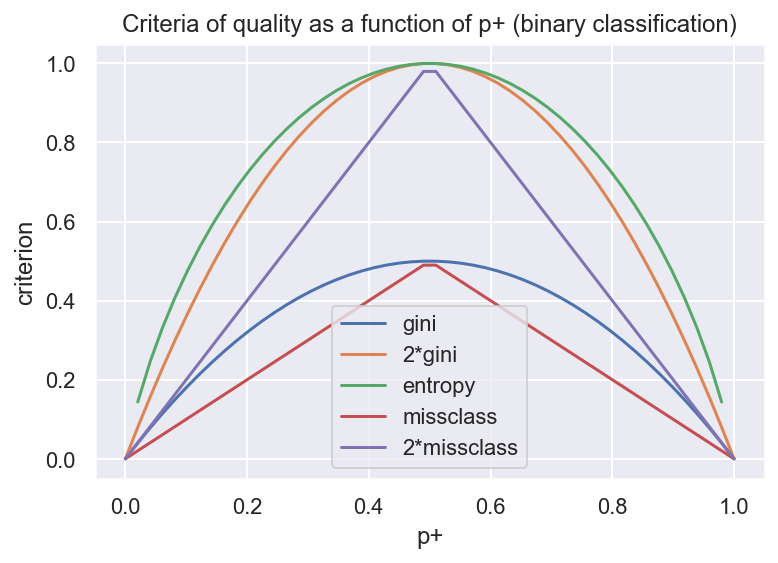

In [3]:
plt.figure(figsize=(6, 4))
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label="gini")
plt.plot(xx, [4 * x * (1 - x) for x in xx], label="2*gini")
plt.plot(xx, [-x * np.log2(x) - (1 - x) * np.log2(1 - x) for x in xx], label="entropy")
plt.plot(xx, [1 - max(x, 1 - x) for x in xx], label="missclass")
plt.plot(xx, [2 - 2 * max(x, 1 - x) for x in xx], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Criteria of quality as a function of p+ (binary classification)")
plt.legend();

**Árbol de decisiones para valores numéricos**

Supongamos que tenemos una característica numérica llamada "Edad" que tiene muchas valores únicos. Un árbol de decisión buscará la mejor división (según algún criterio de ganancia de información) mediante la verificación de atributos binarios como "Edad <17", "Edad < 22.87", y así sucesivamente. Pero, ¿qué sucede si el rango de edades es amplio? O, ¿qué sucede si otra variable cuantitativa, "salario", también puede "dividirse" de muchas maneras? Habrá demasiados atributos binarios para seleccionar en cada paso durante la construcción del árbol. Para resolver este problema, generalmente se utilizan heurísticas para limitar el número de umbrales con los que comparamos la variable cuantitativa.

Consideremos un ejemplo. Supongamos que tenemos el siguiente conjunto de datos:

In [12]:
data = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [13]:
data.sort_values("Age") #Colocar en orden ascendente

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [15]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)

#tree_graph_to_png(
 #   age_tree,
  #feature_names=["Age"],
   # png_file_to_save="topic3_decision_tree2.png",
#)

#Falta instalar Grapvhiz para las graficas

DecisionTreeClassifier(random_state=17)

![](https://mlcourse.ai/_images/topic3_decision_tree2.png)

Observamos que el árbol utilizó los siguientes 5 valores para evaluar por edad: 43.5, 19, 22.5, 30 y 32 años. Si observas detenidamente, estos son exactamente los valores medios entre las edades en las que la clase objetivo cambia de 1 a 0 o de 0 a 1. Para ilustrar aún más, 43.5 es el promedio de 38 y 49 años; un cliente de 38 años no devolvió el préstamo mientras que uno de 49 años sí lo hizo. El árbol busca los valores en los que la clase objetivo cambia su valor como umbral para "dividir" una variable cuantitativa.

Dado esta información, ¿por qué crees que no tiene sentido considerar una característica como "Edad <17.5"?

Consideremos un ejemplo más complejo al agregar la variable "Salario" (en miles de dólares al año).

In [16]:
data2 = pd.DataFrame(
    {
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [17]:
data2.sort_values("Age")

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [18]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values);

In [19]:
#tree_graph_to_png(
 #   tree=age_sal_tree,
  #  feature_names=["Age", "Salary"],
   # png_file_to_save="topic3_decision_tree3.png",
#)

![](https://mlcourse.ai/_images/topic3_decision_tree3.png)

Vemos que el árbol ha realizado particiones tanto por salario como por edad. Además, los umbrales para las comparaciones de características son 43.5 y 22.5 años de edad y 95,000 y 30,500 dólares al año. Nuevamente, vemos que 95 es el promedio entre 88 y 102; la persona con un salario de 88,000 demostró ser "mala" mientras que la que tenía 102,000 fue "buena". Lo mismo ocurre con 30,500. Es decir, solo se buscaron unos pocos valores para las comparaciones por edad y salario. 

Conclusión: La heurística más simple para manejar características numéricas en un árbol de decisión es ordenar sus valores en orden ascendente y verificar solo aquellos umbrales donde cambia el valor de la variable objetivo.

Además, cuando hay muchas características numéricas en un conjunto de datos, cada una con muchos valores únicos, solo se seleccionan los mejores umbrales top-N descritos anteriormente, es decir, solo se utilizan los top-N que proporcionan la ganancia máxima. El proceso consiste en construir un árbol de profundidad 1, calcular la entropía (o incertidumbre de Gini) y seleccionar los mejores umbrales para la comparación.

**Parámetros Cruciales del Árbol**

Construir un árbol de decisión con una hoja para cada instancia individual es técnicamente posible pero poco común en la práctica, ya que conduce al sobreajuste, lo que significa que el árbol estará demasiado adaptado al conjunto de entrenamiento y no será capaz de predecir correctamente las etiquetas para nuevos datos. Además, en las capas más profundas del árbol, se pueden encontrar divisiones basadas en características menos importantes, lo que puede llevar a reglas extremadamente específicas e inútiles, como en el ejemplo de los clientes con pantalones verdes que no devolvieron el préstamo. En general, deseamos evitar que nuestro modelo de clasificación genere reglas excesivamente específicas.

Existen dos excepciones en las que los árboles se construyen hasta la máxima profundidad:

- Random Forest (un grupo de árboles) promedia las respuestas de los árboles individuales que se construyen hasta la máxima profundidad.

- Pruning trees: En este enfoque, el árbol se construye primero hasta la máxima profundidad. Luego, de abajo hacia arriba, se eliminan algunos nodos del árbol al comparar la calidad del árbol con y sin esa partición.


Las formas más comunes de lidiar con el sobreajuste en los árboles de decisión son las siguientes:

- Limitación artificial de la profundidad o un número mínimo de muestras en las hojas: la construcción del árbol simplemente se detiene en algún punto.

- Pruning thhe treee.

**Class `DecisionTreeClassifier` en Scikit-learn**

Los principales parámetros de la clase `sklearn.tree.DecisionTreeClassifier` son los siguientes:

- `max_depth`: la máxima profundidad del árbol.
- `max_features`: el número máximo de características con las que buscar la mejor partición (esto es necesario cuando hay muchas características, ya que sería "costoso" buscar particiones para todas las características).
- `min_samples_leaf`: el número mínimo de muestras en una hoja. Este parámetro evita la creación de árboles en los que cualquier hoja tenga solo unos pocos miembros.

Los parámetros del árbol deben configurarse según los datos de entrada, y generalmente se hacen mediante validación cruzada, como se describe más adelante.

**Decision Tree en Problema de Regresión**

Cuando se realiza la predicción de una variable numérica, la idea de construcción del árbol sigue siendo la misma, pero el criterio de calidad cambia:

- Varianza:
$$D = \frac{1}{l} \sum_{i=1}^{l}(y_i - \frac{1}{l} \sum_{j=1}^{l}y_j)^2$$

Donde $l$ es el número de muestras en una hoja y $y_i$ es el valor de la variable objetivo. En pocas palabras, al minimizar la varianza, buscamos características que dividan el conjunto de entrenamiento de tal manera que los valores de la característica objetivo en cada hoja sean aproximadamente iguales.

Considerando la sigueinte función: $f(x)=e^{-x^2}+1.5e^{-(x-2)^2}$

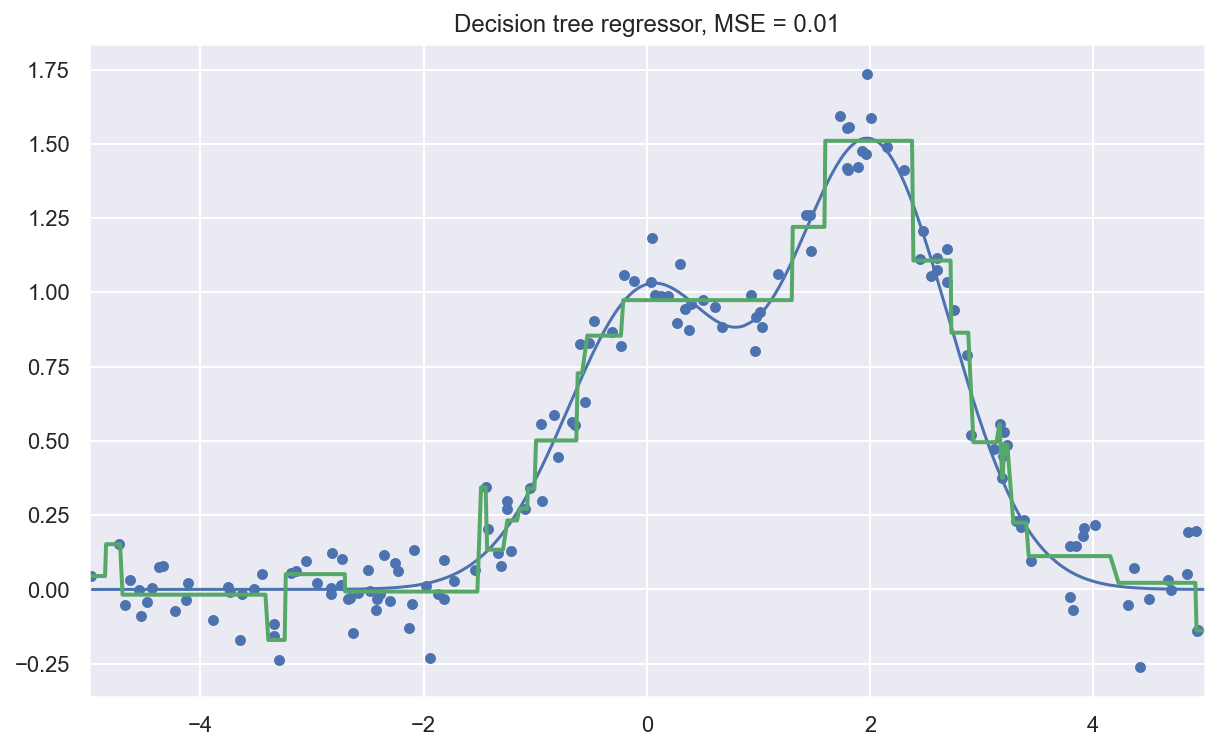

In [28]:
n_train = 150
n_test = 1000
noise = 0.1


def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()

Observamos que el árbol de decisión aproxima los datos con una función constante por tramos.

## 3. Nearest Neighbors Method

El método de los vecinos más cercanos (k-Nearest Neighbors, o k-NN) es otro método de clasificación muy popular que a veces también se utiliza en problemas de regresión. Al igual que los árboles de decisión, este es uno de los enfoques más comprensibles para la clasificación. La intuición subyacente es que te pareces a tus vecinos. Más formalmente, el método sigue la hipótesis de la compacidad: si la distancia entre los ejemplos se mide lo suficientemente bien, entonces es mucho más probable que ejemplos similares pertenezcan a la misma clase.

Ejemplo: Si no sabes cómo etiquetar un auricular Bluetooth en una lista en línea, puedes encontrar 5 auriculares similares y, si 4 de ellos están etiquetados como "accesorios" y solo 1 como "Tecnología", entonces también lo etiquetarás como "accesorios".

Para clasificar cada muestra del conjunto de prueba, es necesario realizar las siguientes operaciones en orden:

1. Calcular la distancia a cada una de las muestras en el conjunto de entrenamiento.

2. Seleccionar $k$ muestras del conjunto de entrenamiento con la distancia mínima a ellas.

3. La clase de la muestra de prueba será la clase más frecuente entre esos $k$ vecinos más cercanos.

El método se adapta fácilmente a problemas de regresión: en el paso 3, no devuelve la clase, sino el número, que es la media (o mediana) de la variable objetivo entre los vecinos.

Una característica notable de este enfoque es su "pereza" (lazy en inglés) ya que los cálculos se realizan solo durante la fase de predicción, cuando se necesita clasificar una muestra de prueba. No se construye ningún modelo a partir de los ejemplos de entrenamiento de antemano. En contraste, el árbol se construye en función del conjunto de entrenamiento, y la clasificación de casos de prueba ocurre relativamente rápido al atravesar el árbol.

Los vecinos más cercanos es un enfoque ampliamente estudiado. Existen muchos teoremas importantes que afirman que, en conjuntos de datos "infinitos", es el método óptimo de clasificación. Los autores del libro clásico "The Elements of Statistical Learning" consideran que k-NN es un algoritmo teóricamente ideal cuyo uso solo está limitado por la capacidad de cálculo y el problema de la maldición de la dimensionalidad.

**Nearest Neighbors Method en Aplicaciones Reales**

- El método k-NN puede servir como un buen punto de partida (baseline) en algunos casos.

- En competencias de Kaggle, a menudo se utiliza k-NN para la construcción de meta-características (es decir, predicciones de k-NN como entrada para otros modelos) o para stacking/blending.

- El método de los vecinos más cercanos se extiende a otras tareas como sistemas de recomendación. La decisión inicial podría ser una recomendación de un producto (o servicio) que es popular entre los vecinos más cercanos de la persona a la que queremos hacer una recomendación.

- En la práctica, en conjuntos de datos grandes, a menudo se utilizan métodos aproximados de búsqueda para encontrar los vecinos más cercanos. Existen varias bibliotecas de código abierto que implementan estos algoritmos; puedes consultar la biblioteca Annoy de Spotify como ejemplo.

La calidad de la clasificación/regresión con k-NN depende de varios parámetros:

1. El número de vecinos $k$.

2. La medida de distancia entre las muestras (las comunes incluyen distancias Hamming, Euclidiana, del coseno y Minkowski). Es importante destacar que la mayoría de estas métricas requieren que los datos estén escalados. En otras palabras, no queremos que la característica "salario", que está en el orden de miles, afecte más a la distancia que "edad", que generalmente es menor de 100.

3. Pesos de los vecinos (cada vecino puede contribuir con pesos diferentes; por ejemplo, cuanto más lejos esté la muestra, menor será el peso).

**Class `KNeighborsClassifier` in Scikit-learn**

Los principales parámetros de la clase `sklearn.neighbors.KNeighborsClassifier` son los siguientes:

- weights: `uniform` (todos los pesos son iguales), `distancia` (el peso es inversamente proporcional a la distancia desde la muestra de prueba) u otra función definida por el usuario.

- algorithm (opcional): `brute`, `ball_tree`, `KD_tree` o `auto`. En el primer caso, los vecinos más cercanos para cada caso de prueba se calculan mediante una búsqueda en cuadrícula sobre el conjunto de entrenamiento. En los casos segundo y tercero, las distancias entre los ejemplos se almacenan en un árbol para acelerar la búsqueda de los vecinos más cercanos. Si configuras este parámetro en auto, la forma adecuada de encontrar los vecinos se elegirá automáticamente en función del conjunto de entrenamiento.

- leaf_size (opcional): umbral para cambiar a la búsqueda en cuadrícula si el algoritmo para encontrar vecinos es BallTree o KDTree.

- metric: `minkowski`, `manhattan`, `euclidean`, `chebyshev` u otra métrica de distancia.

## 4. Seleccionando Parámetros del Modelo y Validación Cruzada

La tarea principal de los algoritmos de aprendizaje es poder generalizar a datos no vistos previamente. Dado que no podemos comprobar de inmediato el rendimiento del modelo en datos nuevos que llegan (porque aún no conocemos los valores reales de la variable objetivo), es necesario sacrificar una pequeña parte de los datos para verificar la calidad del modelo en ellos.

Esto se hace a menudo de una de dos maneras:

- Reservando una parte del conjunto de datos (held-out/hold-out set). De esta manera, reservamos una fracción del conjunto de entrenamiento (generalmente del 20% al 40%), entrenamos el modelo en los datos restantes (el 60-80% del conjunto original) y calculamos métricas de rendimiento para el modelo (por ejemplo, precisión) en el conjunto de retención.

- Validación cruzada (cross-validation). El caso más frecuente aquí es la validación cruzada k-fold.

![](https://mlcourse.ai/_images/cross_validation.png)

En la validación cruzada k-fold, el modelo se entrena k veces en diferentes subconjuntos (k) del conjunto de datos original (en blanco) y se verifica en el subconjunto restante (cada vez uno diferente, mostrado arriba en naranja). Obtenemos k evaluaciones de calidad del modelo que generalmente se promedian para obtener una calidad general promedio de clasificación/regresión.

La validación cruzada proporciona una mejor evaluación de la calidad del modelo en nuevos datos en comparación con el enfoque del conjunto de retención. Sin embargo, la validación cruzada es computacionalmente costosa cuando se tiene muchos datos.

La validación cruzada es una técnica muy importante en el aprendizaje automático y también se puede aplicar en estadísticas y econometría. Ayuda con la optimización de hiperparámetros, la comparación de modelos, la evaluación de características, etc.

## 5. Pros y contras

### 5.1 Decision Trees

**Pros:**

- Generación de reglas de clasificación claras y comprensibles para los humanos, por ejemplo, "si la edad es <25 y está interesado en motocicletas, denegar el préstamo". Esta propiedad se llama interpretabilidad del modelo.
- Los árboles de decisión se pueden visualizar fácilmente, es decir, tanto el modelo en sí (el árbol) como la predicción para un objeto de prueba específico (un camino en el árbol) se pueden "interpretar".
- Entrenamiento y pronóstico rápidos.
- Pequeño número de parámetros del modelo.
- Admite características numéricas y categóricas.

**Cons:**

- Los árboles son muy sensibles al ruido en los datos de entrada; todo el modelo podría cambiar si el conjunto de entrenamiento se modifica ligeramente (por ejemplo, se elimina una característica, se agregan algunos objetos). Esto afecta la interpretabilidad del modelo.
- La frontera de separación construida por un árbol de decisión tiene limitaciones: consiste en hiperplanos perpendiculares a uno de los ejes de coordenadas, lo que es inferior en calidad a algunos otros métodos en la práctica.
- Necesitamos evitar el sobreajuste mediante la poda, estableciendo un número mínimo de muestras en cada hoja o definiendo una profundidad máxima para el árbol. Tenga en cuenta que el sobreajuste es un problema para todos los métodos de aprendizaje automático.
- Inestabilidad. Pequeños cambios en los datos pueden cambiar significativamente el árbol de decisión. Este problema se aborda con conjuntos de árboles de decisión (discutidos la próxima vez).
- El problema de búsqueda de árbol de decisión óptimo es NP-completo. En la práctica, se utilizan algunas heurísticas, como la búsqueda codiciosa de una característica con la ganancia de información máxima, pero no garantiza encontrar el árbol óptimo globalmente.
- Dificultades para admitir valores faltantes en los datos. Friedman estimó que se requería aproximadamente el 50% del código para admitir brechas en los datos en CART (una versión mejorada de este algoritmo se implementa en sklearn).
- El modelo solo puede interpolar pero no extrapolar (lo mismo es cierto para bosques aleatorios y aumento de árboles). Es decir, un árbol de decisión realiza una predicción constante para los objetos que se encuentran más allá de la caja delimitadora establecida por el conjunto de entrenamiento en el espacio de características. En nuestro ejemplo con las bolas amarillas y azules, significaría que el modelo da las mismas predicciones para todas las bolas con posiciones >19 o <0.

### 5.2 Nearest Neighbors Method

**Pros:**

- Implementación sencilla.
- Ampliamente estudiado.
- Típicamente, el método es una buena primera solución no solo para la clasificación o regresión, sino también para recomendaciones.
- Puede adaptarse a un problema específico eligiendo las métricas o el kernel adecuados (en pocas palabras, el kernel puede establecer la operación de similitud para objetos complejos como gráficos mientras mantiene el enfoque k-NN igual).
- Buena interpretabilidad. Hay excepciones: si el número de vecinos es grande, la interpretabilidad empeora ("No le dimos un préstamo porque es similar a los 350 clientes, de los cuales 70 son malos, y eso es un 12% más alto que el promedio para el conjunto de datos").

**Cons:**

- El método se considera rápido en comparación con composiciones de algoritmos, pero el número de vecinos utilizados para la clasificación suele ser grande (100-150) en la vida real, en cuyo caso el algoritmo no funcionará tan rápido como un árbol de decisiones.
- Si un conjunto de datos tiene muchas variables, es difícil encontrar los pesos adecuados y determinar qué características no son importantes para la clasificación/regresión.
- Dependencia de la métrica de distancia seleccionada entre los objetos. La elección de la distancia euclidiana por defecto a menudo no está fundamentada. Puede encontrar una buena solución mediante la búsqueda en cuadrícula de parámetros, pero esto se vuelve muy consumidor de tiempo para conjuntos de datos grandes.
- No hay formas teóricas de elegir el número de vecinos, solo búsqueda en cuadrícula (aunque esto a menudo es cierto para todos los hiperparámetros de todos los modelos). En el caso de un pequeño número de vecinos, el método es sensible a los valores atípicos, es decir, tiende al sobreajuste.
- Por lo general, no funciona bien cuando hay muchas características debido a la "maldición de la dimensionalidad".